In [29]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import svm

import seaborn as sns


%matplotlib inline

### Load Training Data

In [30]:
train_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [31]:
pd.set_option('display.max_rows', 15)
display(train_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


### Analyze and Preprocess Data

#### null and type check

In [32]:
analysis = pd.DataFrame(columns=['col_name','null_num','type_num'])
for col in train_data:
    row = pd.Series({'col_name':col, 
                     'null_num':train_data[col].isnull().sum(), 
                     'type_num':train_data[col].unique().size})
    analysis = analysis.append(row, ignore_index=True)
    
    
pd.set_option('display.max_rows', 21)
display(analysis)

,col_name,null_num,type_num
0,customerID,0,7043
1,gender,0,2
2,SeniorCitizen,0,2
3,Partner,0,2
4,Dependents,0,2
5,tenure,0,73
6,PhoneService,0,2
7,MultipleLines,0,3
8,InternetService,0,3
9,OnlineSecurity,0,3


#### Drop Error Data   (TotalCharges == " ")  and convert to float type

In [34]:
err_rows = pd.to_numeric(train_data['TotalCharges'], errors='coerce').isnull()
err_idx = err_rows.index[err_rows == True]
print("Before:", err_idx, len(err_idx))

train_data = train_data.drop(err_idx)

err_rows = pd.to_numeric(train_data['TotalCharges'], errors='coerce').isnull()
err_idx = err_rows.index[err_rows == True]
print("After:", err_idx, len(err_idx))

train_data.reset_index(inplace=True)

train_data["TotalCharges"] = train_data["TotalCharges"].astype(float)

display(train_data)

Before: Int64Index([], dtype='int64') 0
After: Int64Index([], dtype='int64') 0


,level_0,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,4,9237-HQITU,Female,0,No,No,2,Yes,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,5,5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,6,6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,7,7,6713-OKOMC,Female,0,No,No,10,No,No phone service,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,8,8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,9,9,6388-TABGU,Male,0,No,Yes,62,Yes,No,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Y: Churn  (Yes, NO)

In [35]:
# Check Imbalance
cnt_train_data = train_data.groupby('Churn')["Churn"].count()
display(cnt_train_data)
print("train_data ratio:", cnt_train_data[0]/cnt_train_data[1])


train_Y = pd.DataFrame(data=train_data['Churn'].map({"Yes": 1, "No": 0}).astype(int))
print("train_Y shape:", train_Y.shape)

Churn
No     5163
Yes    1869
Name: Churn, dtype: int64

train_data ratio: 2.7624398073836276
train_Y shape: (7032, 1)


#### Categorical

In [36]:
train_X_cat = train_data[['SeniorCitizen']]

# Binary to 0, 1  ->   gender(male, female), Partner, Dependents, PhoneService, PaperlessBilling, Churn)
train_X_cat.insert(0, 'gender', (train_data['gender'].map({"Male": 1, "Female": 0}).astype(int)))     
train_X_cat.insert(2, 'Partner', (train_data['Partner'].map({"Yes": 1, "No": 0}).astype(int)))
train_X_cat.insert(3, 'Dependents', (train_data['Dependents'].map({"Yes": 1, "No": 0}).astype(int)))
train_X_cat.insert(4, 'PhoneService', (train_data['PhoneService'].map({"Yes": 1, "No": 0}).astype(int)))
train_X_cat.insert(5, 'PaperlessBilling', (train_data['PhoneService'].map({"Yes": 1, "No": 0}).astype(int)))


# One-hot encoded
cat_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 
print("One-hot encoded features:", cat_features, len(cat_features))

train_X_cat = train_X_cat.join(pd.get_dummies(train_data[cat_features]))


display(train_X_cat)

One-hot encoded features: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 10


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
6,1,0,0,1,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
9,1,0,0,1,1,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0


#### Numerical

In [37]:
train_X_num = train_data[['tenure', 'MonthlyCharges', 'TotalCharges']]
display(train_X_num)

# for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
#     train_X_num[col] = (train_X_num[col] - train_X_num[col].mean()) / train_X_num[col].std()
#     train_X_num[col] = (train_X_num[col] - train_X_num[col].mean()) / (train_X_num[col].max() - train_X_num[col].min())
    
train_X_num = pd.DataFrame(preprocessing.normalize(train_X_num, norm='l1', axis=1), columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

display(train_X_num)

analysis = pd.DataFrame(columns=['col_name','mean', 'median', 'std dev', 'max', 'min'])
for col in train_X_num:
    row = pd.Series({'col_name': col,
                     'mean': train_X_num[col].mean(),
                     'median': train_X_num[col].median(),
                     'std dev': train_X_num[col].std(),
                     'max': train_X_num[col].max(),
                     'min': train_X_num[col].min()})
    analysis = analysis.append(row, ignore_index=True)

display(analysis)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


,tenure,MonthlyCharges,TotalCharges
0,0.016474,0.491763,0.491763
1,0.017168,0.028756,0.954076
2,0.012195,0.328354,0.659451
3,0.023340,0.021939,0.954721
4,0.008915,0.315133,0.675953
5,0.008619,0.107364,0.884017
6,0.010677,0.043242,0.946081
7,0.029270,0.087077,0.883653
8,0.008808,0.032968,0.958224
9,0.017193,0.015571,0.967236


,col_name,mean,median,std dev,max,min
0,tenure,0.018770,0.012470,0.012836,0.059937,0.004857
1,MonthlyCharges,0.099967,0.032822,0.141853,0.497572,0.011907
2,TotalCharges,0.881262,0.940852,0.140648,0.978613,0.487047


In [38]:
# Concat
train_X = pd.concat([train_X_num, train_X_cat], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
display(train_X)
print(train_X.columns)

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.016474,0.491763,0.491763,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0.017168,0.028756,0.954076,1,0,0,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
2,0.012195,0.328354,0.659451,1,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0.023340,0.021939,0.954721,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0.008915,0.315133,0.675953,0,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
5,0.008619,0.107364,0.884017,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
6,0.010677,0.043242,0.946081,1,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0
7,0.029270,0.087077,0.883653,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
8,0.008808,0.032968,0.958224,0,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
9,0.017193,0.015571,0.967236,1,0,0,1,1,1,1,...,1,0,0,0,1,0,1,0,0,0


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

### Plot Graphs

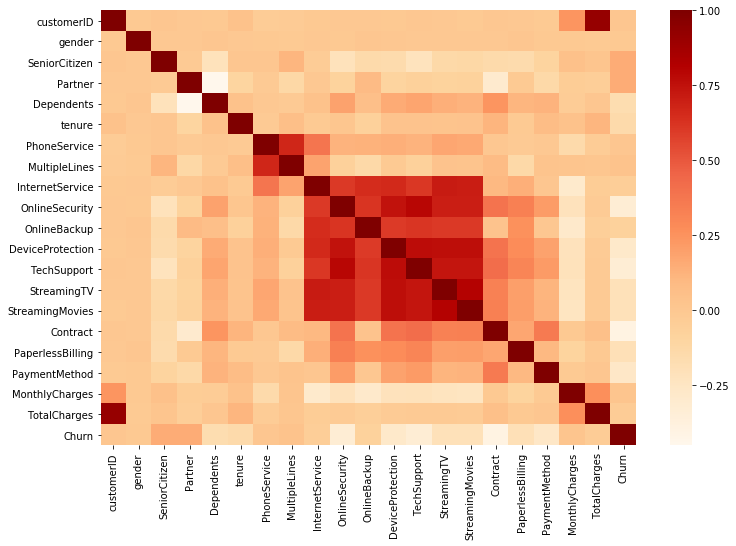

In [46]:
plt.figure(figsize=(12, 8))
corr = train_data.iloc[:, 2:].apply(lambda x: pd.factorize(x)[0]).corr() # factorize categorical data columns
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="OrRd")

In [11]:
churn = train_data[train_data['Churn'] == 'Yes']
non_churn = train_data[train_data['Churn'] == 'No']
names = ['Churn Customers', 'Non-Churn Customers']

#### Numerical

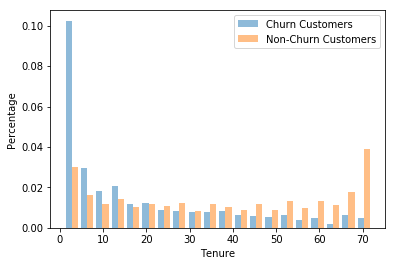

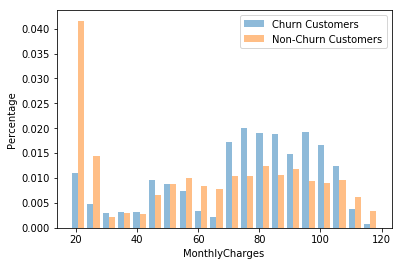

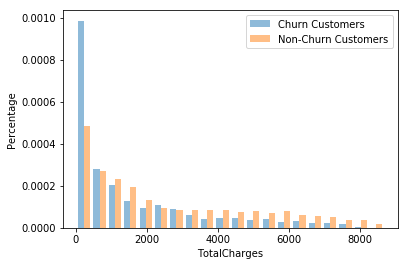

In [12]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    plt.figure()
    plt.hist([churn[col], non_churn[col]], bins=20, density=True, alpha=0.5, label=names)
    plt.legend(loc='upper right')
    plt.xlabel(col[0].upper() + col[1:])
    plt.ylabel('Percentage')
    plt.show()

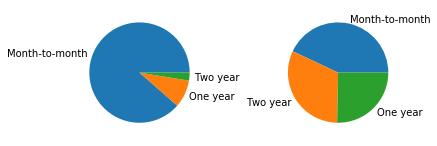

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.pie(churn['Contract'].value_counts().values.tolist(),
        labels=churn['Contract'].value_counts().keys().tolist())

ax2.pie(non_churn['Contract'].value_counts().values.tolist(),
        labels=non_churn['Contract'].value_counts().keys().tolist())

plt.tight_layout()   
plt.show()

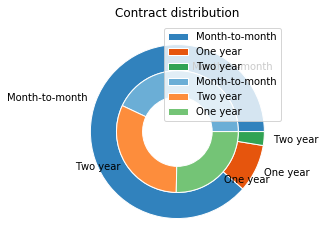

In [14]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5, 9]))

ax.pie(churn['Contract'].value_counts().values.tolist(),
       labels=churn['Contract'].value_counts().keys().tolist(),
       radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(non_churn['Contract'].value_counts().values.tolist(),
       labels=non_churn['Contract'].value_counts().keys().tolist(),
       radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Contract distribution')
plt.legend(loc='upper right')

plt.show()

#### Categorical

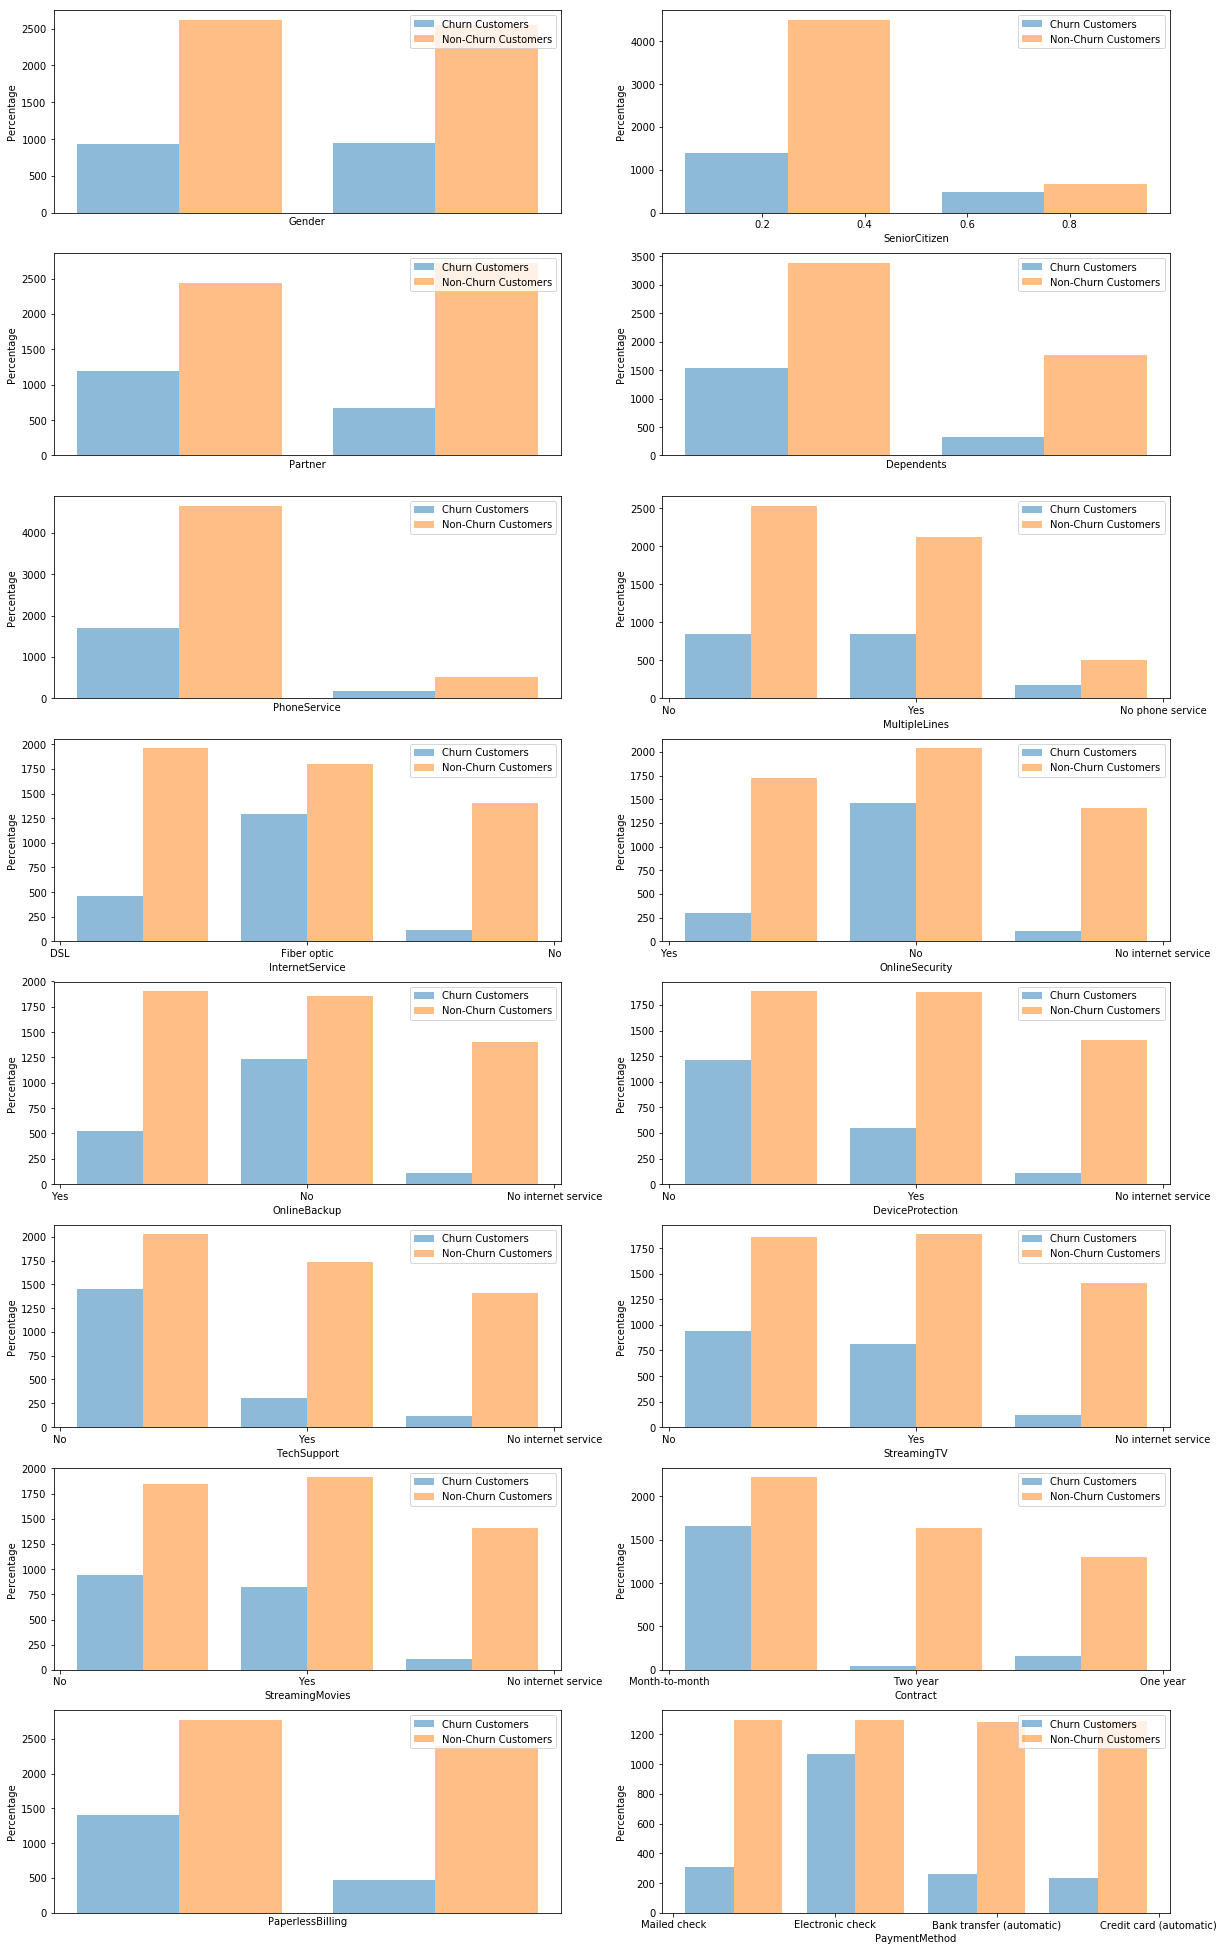

In [15]:
cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod']

PLT_COL = 2
PLT_ROW = int(math.ceil(len(cats) / float(PLT_COL)))
plt.figure(figsize=[20, 35])
for i in range(len(cats)):
    col = cats[i]
    plt.subplot(PLT_ROW, PLT_COL, i + 1)
    plt.hist([churn[col], non_churn[col]], bins=len(churn[col].unique()), density=False, alpha=0.5, label=names)
    plt.legend(loc='upper right')
    plt.xlabel(col[0].upper() + col[1:])
    plt.ylabel('Percentage')

plt.show()

### Hold-out 20% Test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5625, 40) (1407, 40) (5625, 1) (1407, 1)


In [17]:
cnt_train = y_train.groupby('Churn')['Churn'].count()
cnt_test = y_test.groupby('Churn')['Churn'].count()

print("train ratio:", cnt_train[0]/cnt_train[1])
print("test ratio:", cnt_test[0]/cnt_test[1])

train ratio: 2.762541806020067
test ratio: 2.7620320855614975


### Logistic Regression

In [18]:
clf = LogisticRegression()

scores = cross_val_score(clf, x_train, y_train['Churn'], cv=5)

theta = clf.fit(x_train, y_train['Churn'])
y_pred = clf.predict_log_proba(x_test)
score = clf.score(x_test, y_test['Churn'])

print(theta)
print("Logistic Regression Cross-Validation: R2 Score: %f" % (scores.mean()))
print("Logistic Regression Hold-out: R2 Score: %f" % (score))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Logistic Regression Cross-Validation: R2 Score: 0.804267
Logistic Regression Hold-out: R2 Score: 0.781095


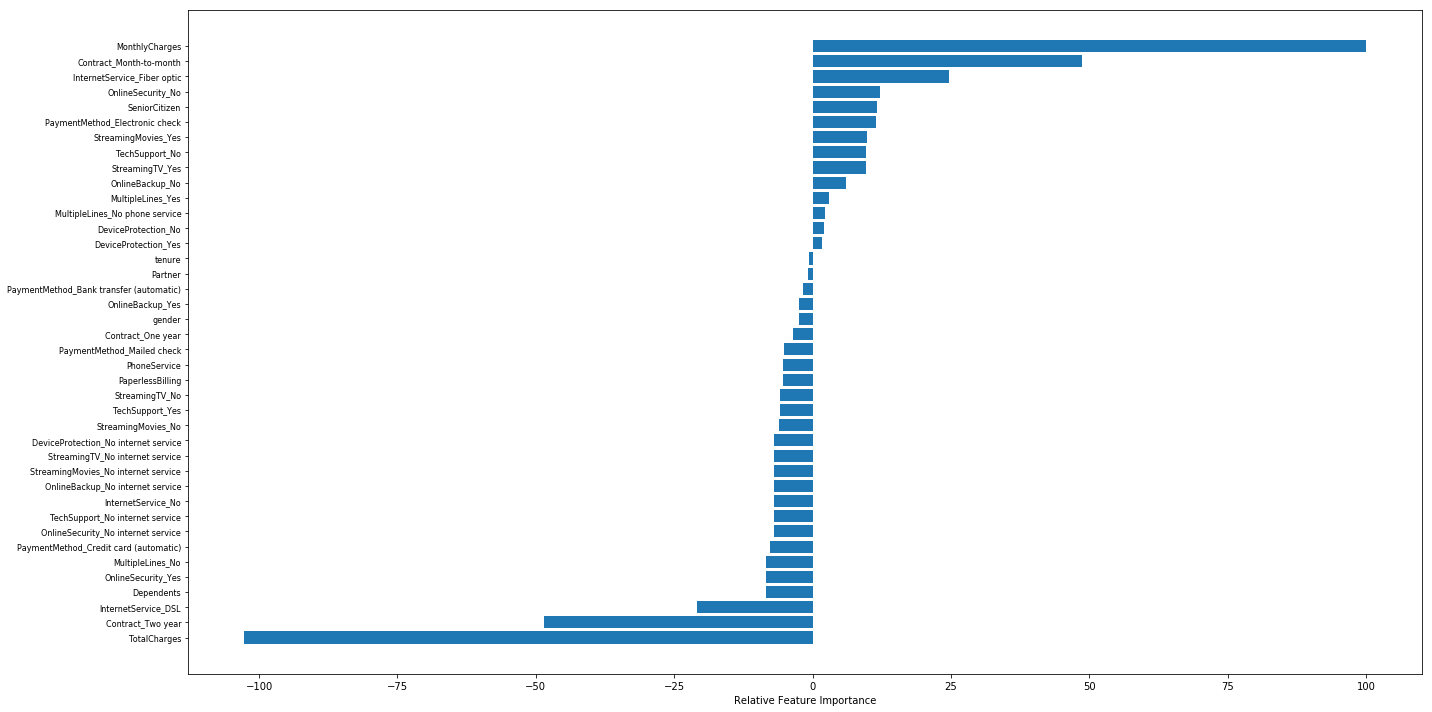

In [19]:
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=[20, 10])
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(
    np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

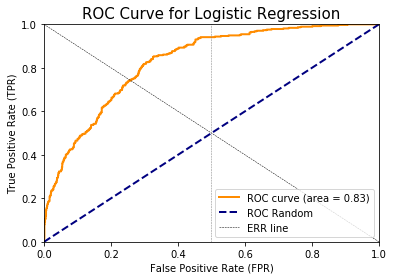

In [20]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:, 1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="ROC Random")
plt.plot([0, 1], [1, 0], color='black', lw=0.5, linestyle='--', label="ERR line")
plt.plot([0.50, 0.50], [0, 1], color='grey', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression', fontsize=15)
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

### SVM Classifier

In [21]:
%%time

clf = svm.SVC(kernel='linear', probability=True)

scores = cross_val_score(clf, x_train, y_train['Churn'], cv=5)

theta = clf.fit(x_train, y_train['Churn'])
y_pred = clf.predict_log_proba(x_test)
score = clf.score(x_test, y_test['Churn'])


print("SVM Classifer Cross-Validation: R2 Score: %f" % (scores.mean()))
print("SVM Classifer Hold-out: R2 Score: %f" % (score))

SVM Classifer Cross-Validation: R2 Score: 0.801778
SVM Classifer Hold-out: R2 Score: 0.783937
CPU times: user 23.2 s, sys: 278 ms, total: 23.5 s
Wall time: 23.5 s


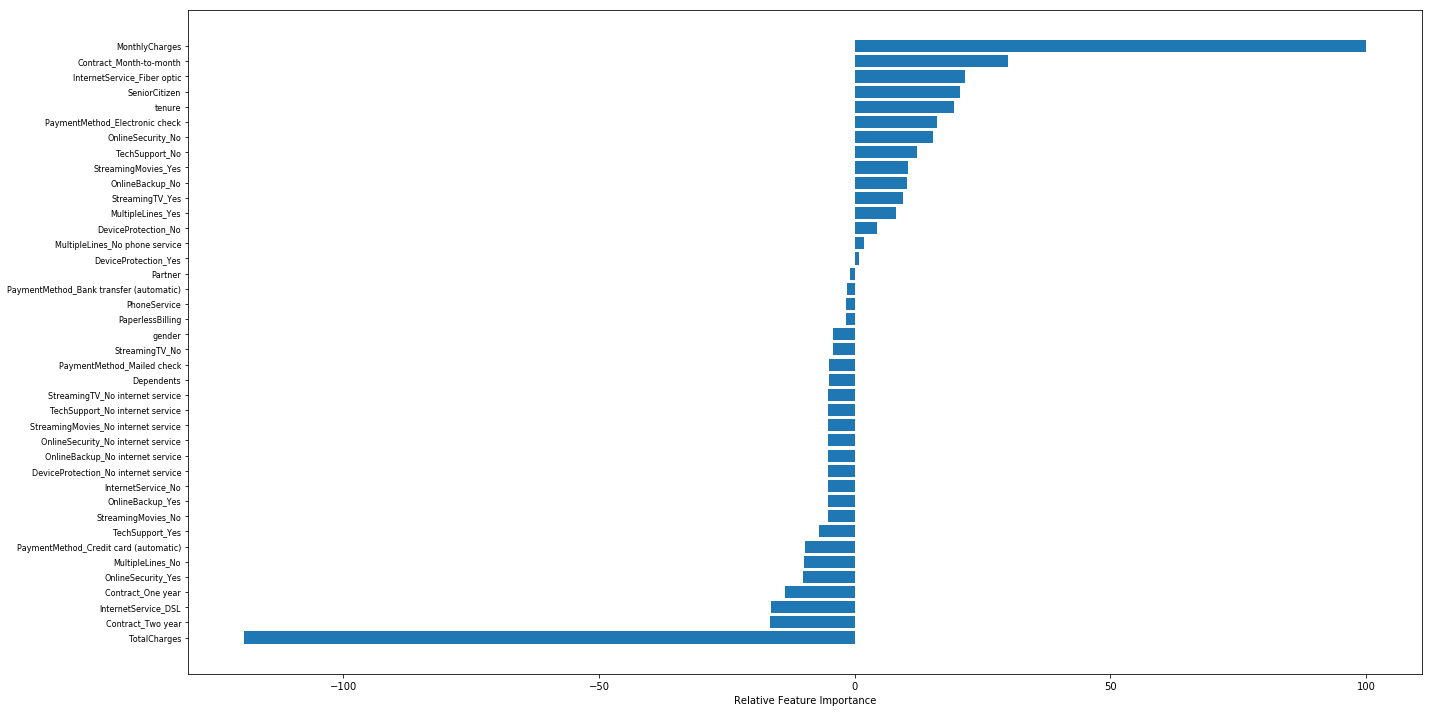

In [22]:
feature_importance = clf.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=[20, 10])
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(
    np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

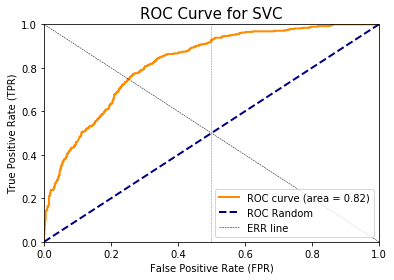

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:, 1])

# plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="ROC Random")
plt.plot([0, 1], [1, 0], color='black', lw=0.5, linestyle='--', label="ERR line")
plt.plot([0.50, 0.50], [0, 1], color='grey', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVC', fontsize=15)
plt.legend(loc="lower right")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()